In [1]:
# Import the required Python Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
# Set the Working Directory
os.chdir('C:/Users/Puneet Kishore/OneDrive/Desktop/Imarticus/Python/Project - Support Vector Machines')

In [3]:
# Import the Data/File from the PC
df = pd.read_csv('BankCreditCard.csv')

In [4]:
df

Customer ID  Credit_Amount  Gender  Academic_Qualification  Marital  \
0                1        20000.0       2                       2        1   
1                2       220000.0       2                       2        2   
2                3        90000.0       2                       2        2   
3                4        50000.0       2                       2        1   
4                5        50000.0       1                       2        1   
...            ...            ...     ...                     ...      ...   
29995        29996       220000.0       1                       3        1   
29996        29997       250000.0       1                       3        2   
29997        29998        30000.0       1                       2        2   
29998        29999        80000.0       1                       3        1   
29999        30000        50000.0       1                       2        1   

       Age_Years  Repayment_Status_Jan  Repayment_Status_Feb  \
0             24                     2                     2   
1             26                     0                     2   
2             34                     0                     0   
3             37                     0                     0   
4             57                     0                     0   
...          ...                   ...                   ...   
29995         39                     0                     0   
29996         43                     0                     0   
29997         37                     4                     3   
29998         41                     1                     0   
29999         46                     0                     0   

       Repayment_Status_March  Repayment_Status_April  ...  April_Bill_Amount  \
0                           0                       0  ...                0.0   
1                           0                       0  ...             3272.0   
2                           0                       0  ...            24332.0   
3                           0                       0  ...            29324.0   
4                           0                       0  ...            20940.0   
...                       ...                     ...  ...                ...   
29995                       0                       0  ...            99004.0   
29996                       0                       0  ...             9979.0   
29997                       2                       0  ...            20979.0   
29998                       0                       0  ...            52774.0   
29999                       0                       0  ...            36535.0   

       May_Bill_Amount  June_Bill_Amount  Previous_Payment_Jan  \
0                  0.0               0.0                   0.0   
1               3455.0            3261.0                   0.0   
2              14848.0           15548.0                1619.0   
3              28858.0           28547.0                3000.0   
4              18146.0           18131.0                3000.0   
...                ...               ...                   ...   
29995          31237.0           15880.0                9600.0   
29996           5180.0               0.0                1937.0   
29997          20582.0           18357.0                   0.0   
29998          11855.0           48844.0               96900.0   
29999          32428.0           15313.0                3079.0   

       Previous_Payment_Feb  Previous_Payment_March  Previous_Payment_April  \
0                     679.0                     0.0                     0.0   
1                    2000.0                  1000.0                  1000.0   
2                    2500.0                  1000.0                  1000.0   
3                    2029.0                  1200.0                  1100.0   
4                   36672.0                 10000.0                  9000.0   
...                     ...                     ...          

In [5]:
# Check the number of rows and columns of the dataset
df.shape

(30000, 25)

In [6]:
# Check the Datatypes of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [7]:
# Check the Str/Character of Numeric columns in the dataset
df.describe()

Customer ID  Credit_Amount        Gender  Academic_Qualification  \
count  30000.000000   3.000000e+04  30000.000000            30000.000000   
mean   15000.500000   1.929173e+05      1.603733                1.855933   
std     8660.398374   1.322888e+05      0.489129                0.794397   
min        1.000000   2.000000e+04      1.000000                1.000000   
25%     7500.750000   5.000000e+04      1.000000                1.000000   
50%    15000.500000   2.200000e+05      2.000000                2.000000   
75%    22500.250000   2.700000e+05      2.000000                2.000000   
max    30000.000000   2.000000e+06      2.000000                6.000000   

            Marital     Age_Years  Repayment_Status_Jan  Repayment_Status_Feb  \
count  30000.000000  30000.000000          30000.000000          30000.000000   
mean       1.551867     35.485500              0.355200              0.319300   
std        0.521970      9.217904              0.746984              0.796012   
min        0.000000     21.000000              0.000000              0.000000   
25%        1.000000     28.000000              0.000000              0.000000   
50%        2.000000     34.000000              0.000000              0.000000   
75%        2.000000     41.000000              0.000000              0.000000   
max        3.000000     79.000000              6.000000              6.000000   

       Repayment_Status_March  Repayment_Status_April  ...  April_Bill_Amount  \
count            30000.000000             30000.00000  ...       30000.000000   
mean                 0.302967                 0.25670  ...       55122.263933   
std                  0.781792                 0.74388  ...       83577.329356   
min                  0.000000                 0.00000  ...     -270000.000000   
25%                  0.000000                 0.00000  ...        2671.500000   
50%                  0.000000                 0.00000  ...       25629.000000   
75%                  0.000000                 0.00000  ...       54508.500000   
max                  6.000000                 6.00000  ...      992596.000000   

       May_Bill_Amount  June_Bill_Amount  Previous_Payment_Jan  \
count     30000.000000      30000.000000          30000.000000   
mean      39939.618800      38506.051533           6285.653867   
std       60373.934792      59104.280171          18944.920299   
min      -81334.000000    -338603.000000              0.000000   
25%        1763.000000       1256.000000           1000.000000   
50%       18043.000000      17071.000000           3000.000000   
75%       50190.500000      48655.250000           6000.000000   
max      827171.000000     861664.000000         973663.000000   

       Previous_Payment_Feb  Previous_Payment_March  Previous_Payment_April  \
count          3.000000e+04            30000.000000            30000.000000   
mean           7.466544e+03             5836.140567             5127.687433   
std            3.467950e+04            20696.306703            17103.762740   
min            0.000000e+00                0.000000                0.000000   
25%            7.700000e+02              550.000000              333.000000   
50%            2.542000e+03             1900.000000             1500.000000   
75%            5.000000e+03             5500.000000             4013.250000   
max            2.674259e+06           999055.000000           538897.000000   

       Previous_Payment_May  Previous_Payment_June  Default_Payment  
count           30000.00000           30000.000000     30000.000000  
mean             5261.19120            5215.502567         0.221200  
std             16989.50685           17777.465775         0.415062  
min                 0.00000               0.000000         0.000000  
25%               310.00000             117.750000         0.000000  
50%              1539.00000            1500.000000         0.000000  
75%              5000.00000            4000.000000         0.00000

In [8]:
# Check for the Null Values
df.isna().sum()

Customer ID               0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

#### There are no Null Values, so we can move forward with the Data Visualization and see if the target variable is balanced or not.

In [9]:
# Check the Unique Values of the Dependent/Target Variable 'Default_Payment'
df['Default_Payment'].unique()

array([1, 0], dtype=int64)

In [10]:
# Check the Value Counts of the Dependent/Target Variable 'Default_Payment'
df['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

C:\Users\Puneet Kishore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Default_Payment', ylabel='count'>

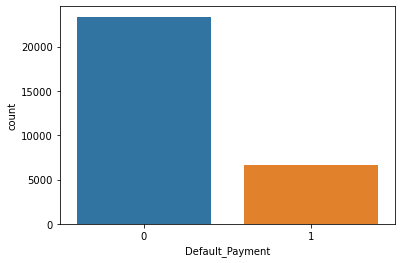

In [11]:
# Visualize the Value Counts of the Dependent/Target Variable 'Default_Payment' through Countplot
sns.countplot(df['Default_Payment'])

#### We can see that 78% belongs to '0' i.e., 'No Payment' and 22% belongs to '1' i.e., 'Payment Made'.

In [12]:
# Check the Correlation of the Varables in the dataset 'df'
df.corr()

Customer ID  Credit_Amount    Gender  \
Customer ID                1.000000       0.026884  0.018497   
Credit_Amount              0.026884       1.000000  0.039800   
Gender                     0.018497       0.039800  1.000000   
Academic_Qualification     0.039828      -0.213506  0.012897   
Marital                   -0.029079      -0.104797 -0.031389   
Age_Years                  0.018678       0.135357 -0.090874   
Repayment_Status_Jan      -0.020016      -0.174325 -0.034521   
Repayment_Status_Feb      -0.009494      -0.200720 -0.044876   
Repayment_Status_March    -0.018233      -0.196130 -0.041174   
Repayment_Status_April     0.013914      -0.185646 -0.039701   
Repayment_Status_May      -0.020911      -0.173779 -0.038613   
Repayment_Status_June     -0.033201      -0.168446 -0.032042   
Jan_Bill_Amount            0.014824       0.287284 -0.028792   
Feb_Bill_Amount            0.020680       0.280384 -0.030322   
March_Bill_Amount          0.019882       0.288211 -0.022342   
April_Bill_Amount          0.035671       0.298477 -0.020222   
May_Bill_Amount            0.016959       0.304191 -0.016988   
June_Bill_Amount           0.016620       0.300507 -0.016661   
Previous_Payment_Jan       0.009667       0.179265 -0.000450   
Previous_Payment_Feb       0.008546       0.141631 -0.000724   
Previous_Payment_March     0.037526       0.202709 -0.007833   
Previous_Payment_April     0.008646       0.187128 -0.002471   
Previous_Payment_May       0.003044       0.201680 -0.001337   
Previous_Payment_June      0.003000       0.206527 -0.002766   
Default_Payment           -0.013952      -0.156759 -0.039961   

                        Academic_Qualification   Marital  Age_Years  \
Customer ID                           0.039828 -0.029079   0.018678   
Credit_Amount                        -0.213506 -0.104797   0.135357   
Gender                                0.012897 -0.031389  -0.090874   
Academic_Qualification                1.000000 -0.141637   0.175458   
Marital                              -0.141637  1.000000  -0.414170   
Age_Years                             0.175458 -0.414170   1.000000   
Repayment_Status_Jan                  0.049837 -0.011686  -0.001731   
Repayment_Status_Feb                  0.054034 -0.009814  -0.008871   
Repayment_Status_March                0.044626  0.000334  -0.014417   
Repayment_Status_April                0.043856 -0.004372  -0.007554   
Repayment_Status_May                  0.032593 -0.003106  -0.013825   
Repayment_Status_June                 0.021863  0.002056  -0.017838   
Jan_Bill_Amount                       0.022945 -0.025129   0.049506   
Feb_Bill_Amount                       0.014368 -0.022228   0.055387   
March_Bill_Amount                     0.012281 -0.024802   0.048118   
April_Bill_Amount                     0.000233 -0.022968   0.046557   
May_Bill_Amount                      -0.009492 -0.025466   0.049390   
June_Bill_Amount                     -0.011344 -0.021300   0.047581   
Previous_Payment_Jan                 -0.036724 -0.006659   0.025527   
Previous_Payment_Feb                 -0.024299 -0.005525   0.017073   
Previous_Payment_March               -0.037803 -0.003442   0.029415   
Previous_Payment_April               -0.037529 -0.013082   0.019102   
Previous_Payment_May                 -0.039920 -0.000316   0.020990   
Previous_Payment_June                -0.037448 -0.006641   0.019478   
Default_Payment                       0.025985 -0.024339   0.013890   

                        Repayment_Status_Jan  Repayment_Status_Feb  \
Customer ID                        -0.020016             -0.009494   
Credit_Amount                      -0.174325             -0.200720   
Gender                             -0.034521             -0.044876   
Academic_Qualification              0.049837              0.054034   
Marital                            -0.011686             -0.009814   
Age_Years                          -0.001731             -0.008871   
Repayment_Status_Jan  

<AxesSubplot:>

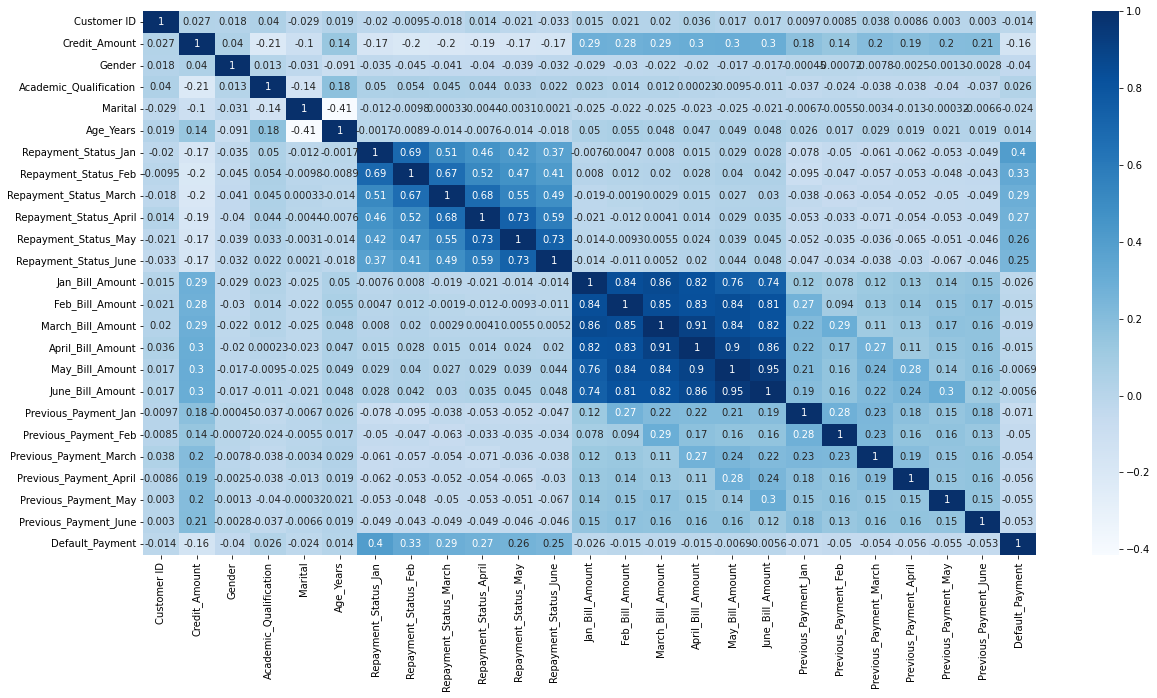

In [13]:
# Visualize the Correlation with the Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

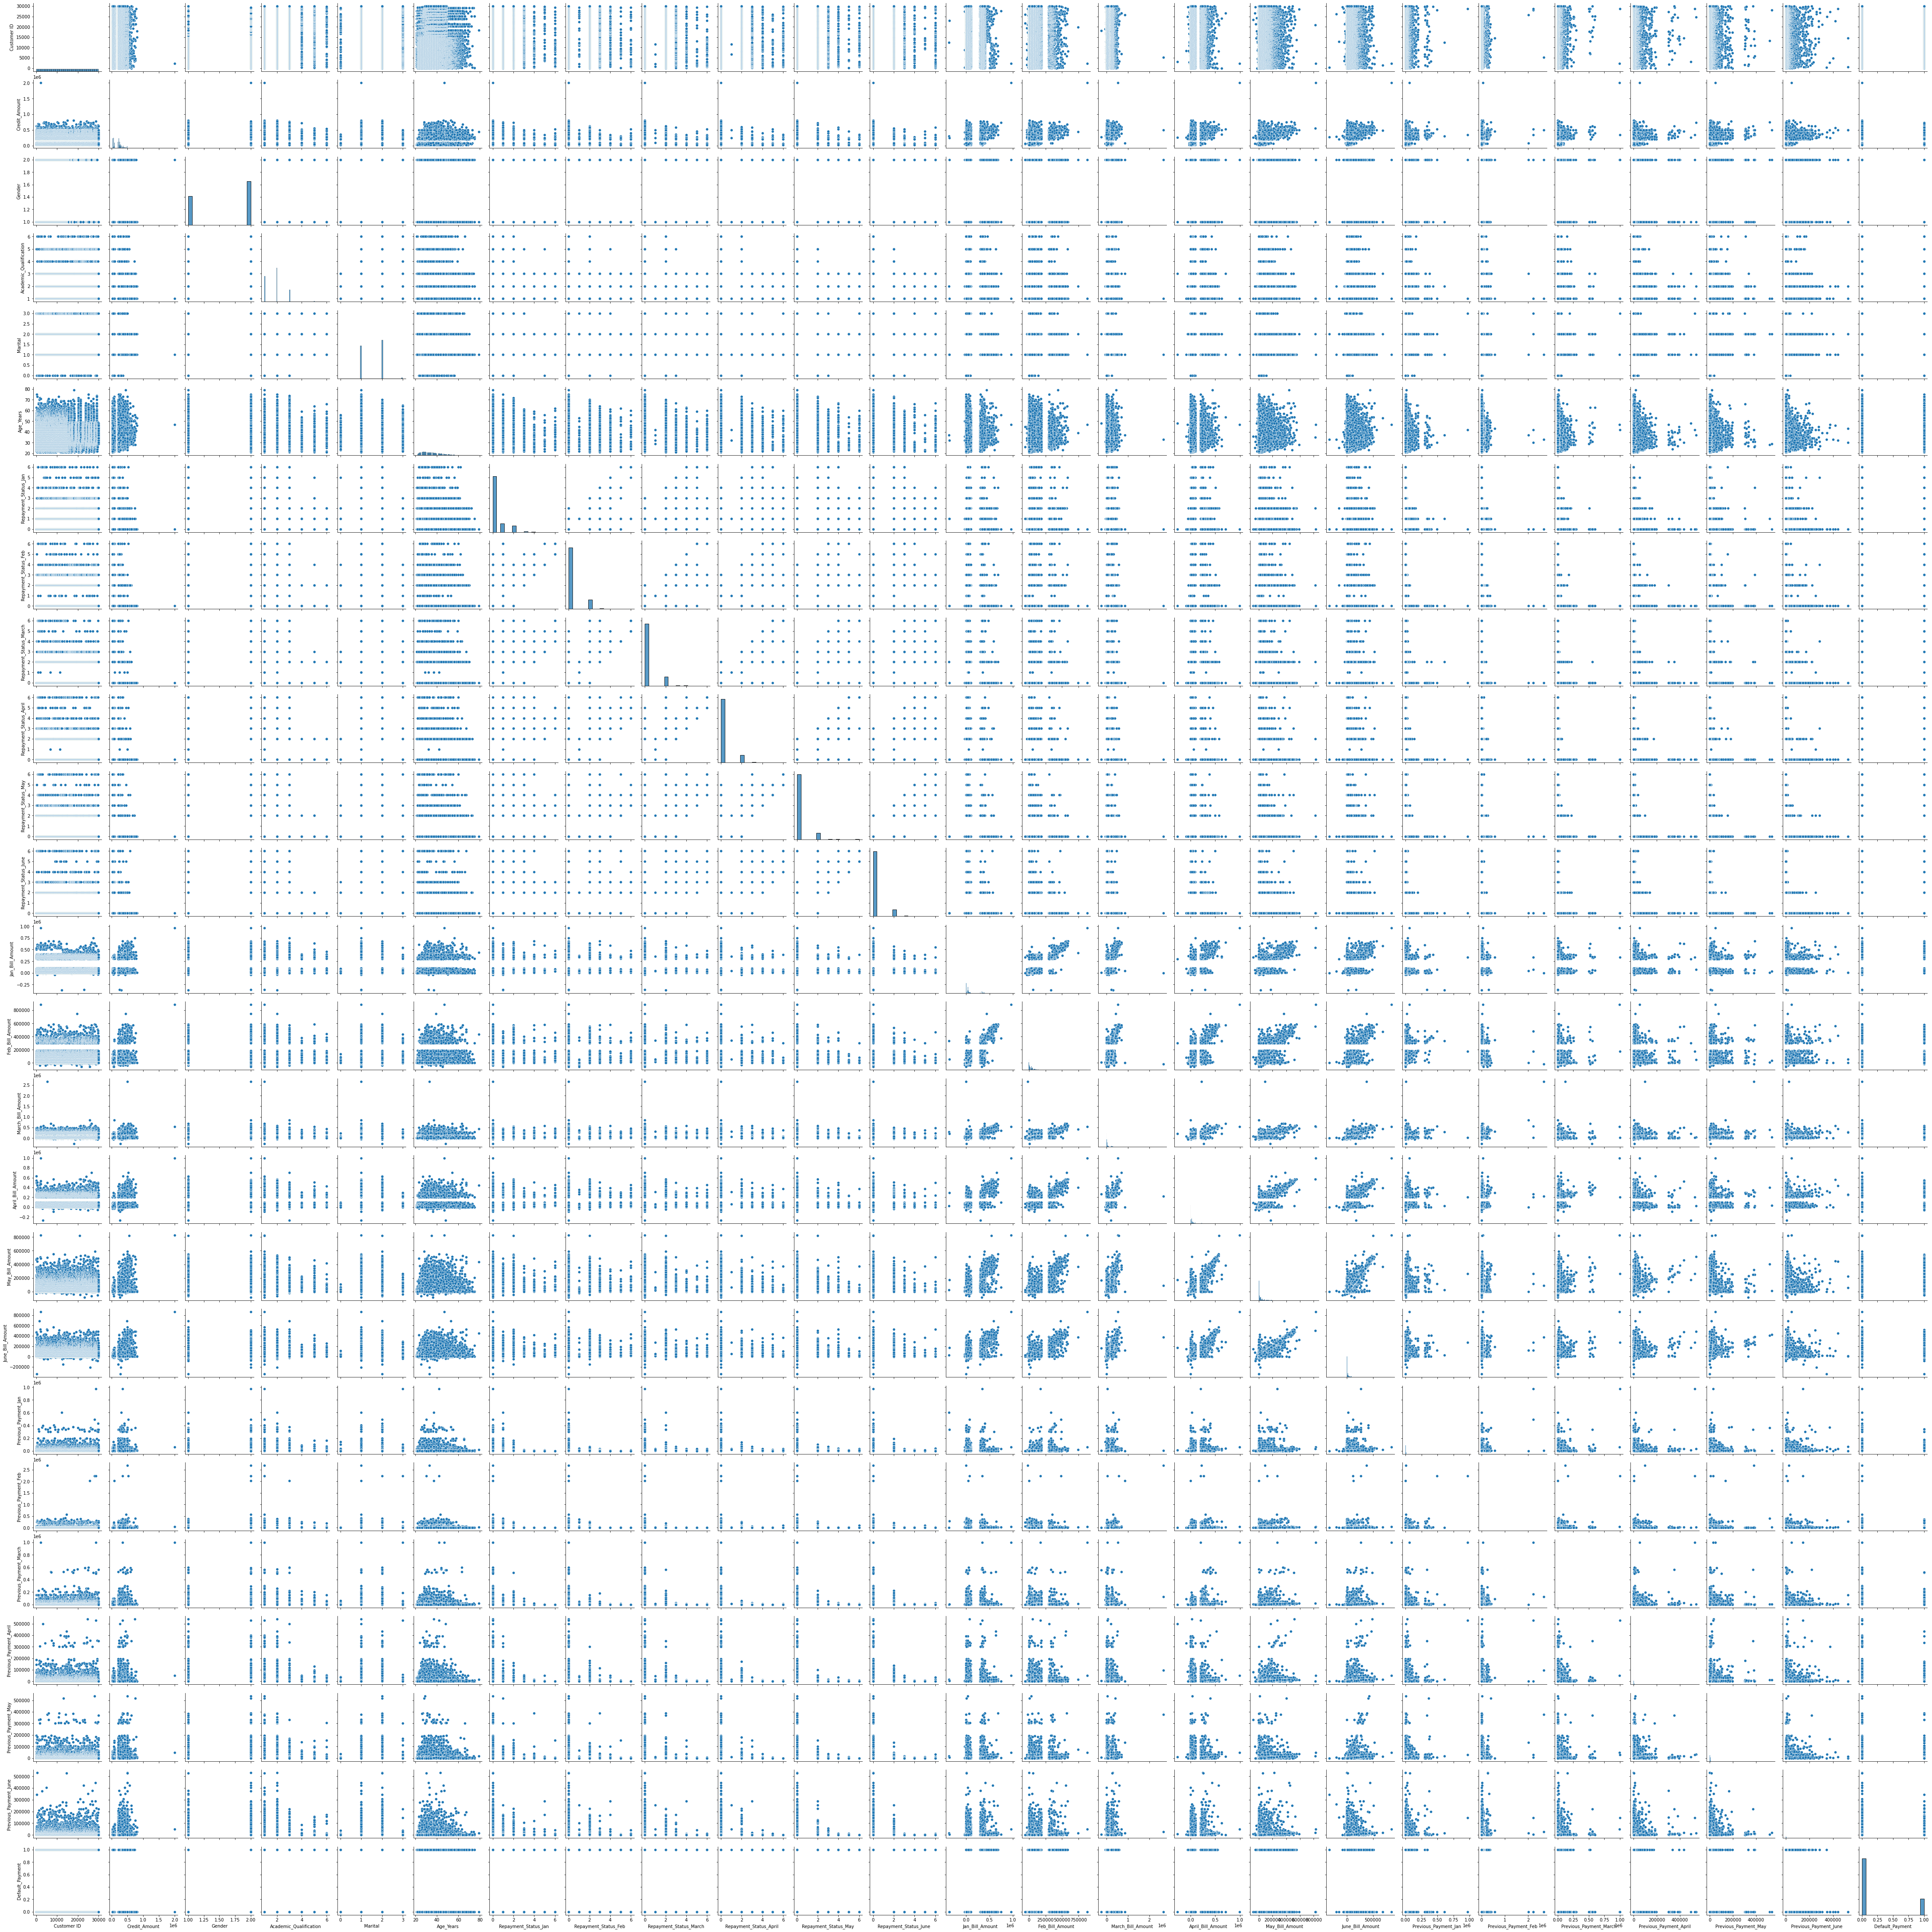

In [14]:
# Use Pairplot to find the relationship in the dataset 'df' where the variables are continuous and categorical
sns.pairplot(df)

<AxesSubplot:xlabel='Gender', ylabel='Default_Payment'>

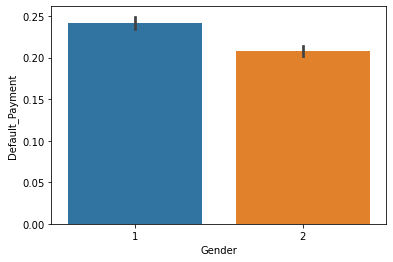

In [15]:
# Visualize the 'Default_Payment' based on the 'Gender' through Barplot
sns.barplot(x = df['Gender'], y = df['Default_Payment'])

##### Based on the above Barplot, we can refer that most of the Default Payments are done by Males as compared to that of Females.

<AxesSubplot:xlabel='Academic_Qualification', ylabel='Default_Payment'>

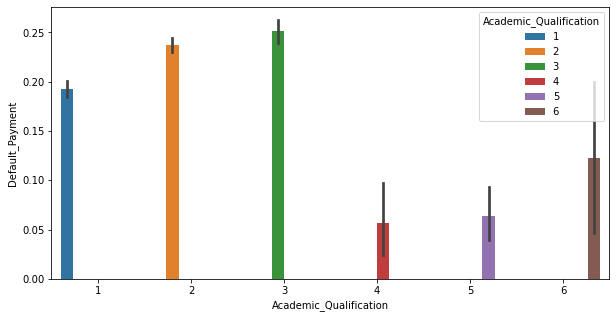

In [16]:
# Visualize the 'Default_Payment' based on the 'Academic_Qualification' through Barplot
plt.figure(figsize = (10,5))
sns.barplot(x = df['Academic_Qualification'], y = df['Default_Payment'], hue = df['Academic_Qualification'])

##### Based on the above Barplot, we can refer that most of the Default Payments are done by Postgraduates follwed by Graduates and Undergraduates whereas Professionals and Others have Low Default Payment rate.

<AxesSubplot:xlabel='Marital', ylabel='Default_Payment'>

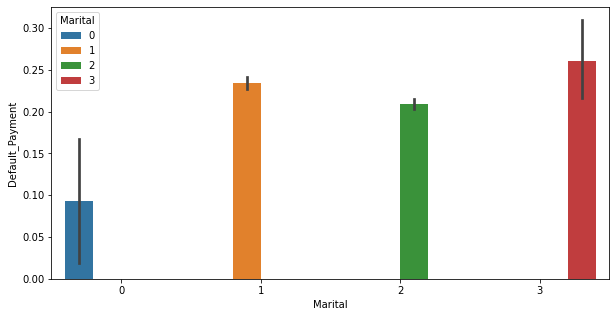

In [17]:
# Visualize the 'Default_Payment' based on the 'Marital' through Barplot
plt.figure(figsize = (10,5))
sns.barplot(x = df['Marital'], y = df['Default_Payment'], hue = df['Marital'])

#### Marital Category with 0 doesn't exist in the dataset 'df'. So we've to remove 0 from 'Marital' column.

In [18]:
# Removing 0 from 'Marital' column
df.drop(df[df['Marital'] == 0].index, inplace = True)

<AxesSubplot:xlabel='Marital', ylabel='count'>

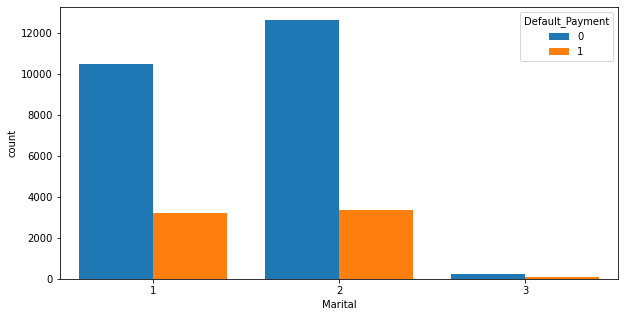

In [19]:
# Again Visualize the 'Default_Payment' based on the 'Marital' through Countplot after removing 0
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = df['Marital'], hue = df['Default_Payment'], saturation = 1)

#### People with Marital Status 'Single' and 'Married' have High Default Payment rate whereas the category who doen't wish to disclose their Marital Status has Low and Balanced Default Payment Rate.

In [20]:
# Drop 'Customer ID' column from the dataset
df1 = df.drop('Customer ID', axis = 1)

In [21]:
# Check the dataset after removing 'Customer ID' column
df1

Credit_Amount  Gender  Academic_Qualification  Marital  Age_Years  \
0            20000.0       2                       2        1         24   
1           220000.0       2                       2        2         26   
2            90000.0       2                       2        2         34   
3            50000.0       2                       2        1         37   
4            50000.0       1                       2        1         57   
...              ...     ...                     ...      ...        ...   
29995       220000.0       1                       3        1         39   
29996       250000.0       1                       3        2         43   
29997        30000.0       1                       2        2         37   
29998        80000.0       1                       3        1         41   
29999        50000.0       1                       2        1         46   

       Repayment_Status_Jan  Repayment_Status_Feb  Repayment_Status_March  \
0                         2                     2                       0   
1                         0                     2                       0   
2                         0                     0                       0   
3                         0                     0                       0   
4                         0                     0                       0   
...                     ...                   ...                     ...   
29995                     0                     0                       0   
29996                     0                     0                       0   
29997                     4                     3                       2   
29998                     1                     0                       0   
29999                     0                     0                       0   

       Repayment_Status_April  Repayment_Status_May  ...  April_Bill_Amount  \
0                           0                     0  ...                0.0   
1                           0                     0  ...             3272.0   
2                           0                     0  ...            24332.0   
3                           0                     0  ...            29324.0   
4                           0                     0  ...            20940.0   
...                       ...                   ...  ...                ...   
29995                       0                     0  ...            99004.0   
29996                       0                     0  ...             9979.0   
29997                       0                     0  ...            20979.0   
29998                       0                     0  ...            52774.0   
29999                       0                     0  ...            36535.0   

       May_Bill_Amount  June_Bill_Amount  Previous_Payment_Jan  \
0                  0.0               0.0                   0.0   
1               3455.0            3261.0                   0.0   
2              14848.0           15548.0                1619.0   
3              28858.0           28547.0                3000.0   
4              18146.0           18131.0                3000.0   
...                ...               ...                   ...   
29995          31237.0           15880.0                9600.0   
29996           5180.0               0.0                1937.0   
29997          20582.0           18357.0                   0.0   
29998          11855.0           48844.0               96900.0   
29999          32428.0           15313.0                3079.0   

       Previous_Payment_Feb  Previous_Payment_March  Previous_Payment_April  \
0                     679.0                     0.0                     0.0   
1                    2000.0                  1000.0                  1000.0   
2                    2500.0                  1000.0                  1000.0   
3                    2029.0                  1200.0                  1100.0   
4                   36672.0     

In [22]:
# Check the number of rows and columns after removing 'Customer ID' column
df1.shape

(29946, 24)

In [23]:
print("Total number of records: {}".format(df1.shape[0]))
print("Total number of records belong to Non-Default: {}". format(df1[df1['Default_Payment'] == 0].shape[0]))
print("Total number of records belong to Default: {}". format(df1[df1['Default_Payment'] == 1].shape[0]))

Total number of records: 29946
Total number of records belong to Non-Default: 23315
Total number of records belong to Default: 6631


In [24]:
# Segregating the dataset into independent and dependent variables
x = df1.drop('Default_Payment', axis = 1)
y = df1['Default_Payment']

In [25]:
# Check the Independent Variables
x

Credit_Amount  Gender  Academic_Qualification  Marital  Age_Years  \
0            20000.0       2                       2        1         24   
1           220000.0       2                       2        2         26   
2            90000.0       2                       2        2         34   
3            50000.0       2                       2        1         37   
4            50000.0       1                       2        1         57   
...              ...     ...                     ...      ...        ...   
29995       220000.0       1                       3        1         39   
29996       250000.0       1                       3        2         43   
29997        30000.0       1                       2        2         37   
29998        80000.0       1                       3        1         41   
29999        50000.0       1                       2        1         46   

       Repayment_Status_Jan  Repayment_Status_Feb  Repayment_Status_March  \
0                         2                     2                       0   
1                         0                     2                       0   
2                         0                     0                       0   
3                         0                     0                       0   
4                         0                     0                       0   
...                     ...                   ...                     ...   
29995                     0                     0                       0   
29996                     0                     0                       0   
29997                     4                     3                       2   
29998                     1                     0                       0   
29999                     0                     0                       0   

       Repayment_Status_April  Repayment_Status_May  ...  March_Bill_Amount  \
0                           0                     0  ...              689.0   
1                           0                     0  ...             2682.0   
2                           0                     0  ...            23559.0   
3                           0                     0  ...            49292.0   
4                           0                     0  ...            35835.0   
...                       ...                   ...  ...                ...   
29995                       0                     0  ...           208365.0   
29996                       0                     0  ...             3502.0   
29997                       0                     0  ...             2758.0   
29998                       0                     0  ...            76304.0   
29999                       0                     0  ...            49764.0   

       April_Bill_Amount  May_Bill_Amount  June_Bill_Amount  \
0                    0.0              0.0               0.0   
1                 3272.0           3455.0            3261.0   
2                24332.0          14848.0           15548.0   
3                29324.0          28858.0           28547.0   
4                20940.0          18146.0           18131.0   
...                  ...              ...               ...   
29995            99004.0          31237.0           15880.0   
29996             9979.0           5180.0               0.0   
29997            20979.0          20582.0           18357.0   
29998            52774.0          11855.0           48844.0   
29999            36535.0          32428.0           15313.0   

       Previous_Payment_Jan  Previous_Payment_Feb  Previous_Payment_March  \
0                       0.0                 679.0                     0.0   
1                       0.0                2000.0                  1000.0   
2                    1619.0                2500.0                  1000.0   
3                    3000.0                2029.0                  1200.0   
4                    3000.0               36672.0                 10000.0   
.

In [26]:
# Check the Dependent Variable
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default_Payment, Length: 29946, dtype: int64

In [27]:
# Perform Train and Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [28]:
x_train

Credit_Amount  Gender  Academic_Qualification  Marital  Age_Years  \
4309        260000.0       1                       1        2         34   
17774       220000.0       2                       2        1         54   
15215       260000.0       2                       2        2         28   
15351       260000.0       2                       3        1         44   
14873        20000.0       1                       2        2         23   
...              ...     ...                     ...      ...        ...   
13146       240000.0       2                       2        2         32   
19681       220000.0       2                       2        1         39   
9861        220000.0       1                       3        1         58   
10817       260000.0       2                       2        2         32   
2739        220000.0       1                       1        1         53   

       Repayment_Status_Jan  Repayment_Status_Feb  Repayment_Status_March  \
4309                      0                     0                       0   
17774                     2                     2                       2   
15215                     0                     0                       0   
15351                     0                     0                       0   
14873                     1                     2                       0   
...                     ...                   ...                     ...   
13146                     0                     0                       0   
19681                     0                     0                       0   
9861                      0                     0                       0   
10817                     2                     2                       2   
2739                      0                     0                       0   

       Repayment_Status_April  Repayment_Status_May  ...  March_Bill_Amount  \
4309                        0                     0  ...              326.0   
17774                       0                     0  ...            92453.0   
15215                       0                     0  ...             2264.0   
15351                       2                     2  ...             2904.0   
14873                       0                     0  ...             9823.0   
...                       ...                   ...  ...                ...   
13146                       0                     0  ...                0.0   
19681                       0                     0  ...           208207.0   
9861                        0                     0  ...                0.0   
10817                       2                     0  ...              400.0   
2739                        0                     0  ...             2582.0   

       April_Bill_Amount  May_Bill_Amount  June_Bill_Amount  \
4309               326.0            326.0             476.0   
17774            92097.0          86508.0           83773.0   
15215             3975.0           3720.0            5668.0   
15351             2323.0           2753.0            2181.0   
14873            20023.0              0.0               0.0   
...                  ...              ...               ...   
13146                0.0           1186.0               0.0   
19681            96223.0          68003.0           52684.0   
9861                 0.0              0.0           52884.0   
10817                0.0          20818.0           20818.0   
2739              2209.0           3318.0            2113.0   

       Previous_Payment_Jan  Previous_Payment_Feb  Previous_Payment_March  \
4309                  939.0                 326.0                   526.0   
17774                3400.0                   0.0                  5290.0   
15215                3060.0                2264.0                  2000.0   
15351                3000.0                3037.0                     0.0   
14873                   0.0                2000.0                   200.0   
.

In [29]:
x_test

Credit_Amount  Gender  Academic_Qualification  Marital  Age_Years  \
29889       340000.0       1                       2        1         37   
7365        420000.0       2                       2        1         30   
21402        50000.0       2                       3        2         26   
7634         60000.0       2                       2        1         35   
9290        270000.0       2                       2        2         34   
...              ...     ...                     ...      ...        ...   
13276       220000.0       1                       3        2         26   
29100       320000.0       2                       3        1         52   
22315       220000.0       2                       3        1         30   
21956        50000.0       2                       1        2         27   
2097        230000.0       2                       2        1         47   

       Repayment_Status_Jan  Repayment_Status_Feb  Repayment_Status_March  \
29889                     0                     0                       0   
7365                      0                     0                       0   
21402                     0                     0                       0   
7634                      0                     0                       0   
9290                      0                     0                       0   
...                     ...                   ...                     ...   
13276                     0                     0                       0   
29100                     0                     0                       0   
22315                     1                     2                       0   
21956                     0                     0                       0   
2097                      0                     0                       0   

       Repayment_Status_April  Repayment_Status_May  ...  March_Bill_Amount  \
29889                       0                     0  ...            80832.0   
7365                        0                     0  ...           253092.0   
21402                       0                     0  ...                0.0   
7634                        0                     0  ...            54853.0   
9290                        0                     0  ...           225927.0   
...                       ...                   ...  ...                ...   
13276                       0                     0  ...            30454.0   
29100                       0                     0  ...              228.0   
22315                       0                     0  ...           227580.0   
21956                       0                     0  ...            22656.0   
2097                        0                     0  ...            39238.0   

       April_Bill_Amount  May_Bill_Amount  June_Bill_Amount  \
29889            92599.0          83546.0           85362.0   
7365            222922.0          88708.0           36484.0   
21402                0.0              0.0             238.0   
7634             39222.0          38714.0           38850.0   
9290            206350.0          88365.0           88808.0   
...                  ...              ...               ...   
13276            33200.0          34727.0           36823.0   
29100                0.0           2355.0               0.0   
22315           220042.0          80578.0           82280.0   
21956             5435.0           6337.0            7227.0   
2097             40023.0          40536.0           41687.0   

       Previous_Payment_Jan  Previous_Payment_Feb  Previous_Payment_March  \
29889                9000.0                4000.0                  5000.0   
7365                 1376.0              256564.0                     0.0   
21402                4600.0                   0.0                     0.0   
7634                 3300.0                2000.0                  1500.0   
9290                 6000.0                5700.0                  5900.0   
.

In [30]:
y_train

4309     0
17774    1
15215    0
15351    0
14873    1
        ..
13146    1
19681    0
9861     0
10817    0
2739     0
Name: Default_Payment, Length: 23956, dtype: int64

In [31]:
y_test

29889    0
7365     0
21402    1
7634     0
9290     0
        ..
13276    0
29100    0
22315    1
21956    0
2097     0
Name: Default_Payment, Length: 5990, dtype: int64

In [32]:
# Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [33]:
x_train = sc.transform(x_train)

In [34]:
x_train

array([[ 0.50313947, -1.23238295, -1.07865909, ..., -0.28904966,
        -0.27703652, -0.27808226],
       [ 0.20214792,  0.81143609,  0.18672249, ...,  0.11485369,
        -0.310697  , -0.09698754],
       [ 0.50313947,  0.81143609,  0.18672249, ..., -0.2184499 ,
        -0.13538196, -0.1975767 ],
       ...,
       [ 0.20214792, -1.23238295,  1.45210406, ..., -0.30935088,
         2.83825338,  5.73182059],
       [ 0.50313947,  0.81143609,  0.18672249, ...,  1.55824004,
        -0.310697  , -0.29668241],
       [ 0.20214792, -1.23238295, -1.07865909, ..., -0.10821731,
        -0.12877843,  0.01198881]])

In [35]:
x_test = sc.transform(x_test)

In [36]:
x_test

array([[ 1.10512258, -1.23238295,  0.18672249, ..., -0.10936872,
        -0.11785045, -0.0684597 ],
       [ 1.70710569,  0.81143609,  0.18672249, ..., -0.30935088,
         1.82726996,  3.66184057],
       [-1.07706619,  0.81143609,  1.45210406, ..., -0.30935088,
        -0.2908864 , -0.10480417],
       ...,
       [ 0.20214792,  0.81143609,  1.45210406, ..., -0.12754892,
        -0.13538196, -0.11410424],
       [-1.07706619,  0.81143609, -1.07865909, ..., -0.24875022,
        -0.25225866, -0.2804786 ],
       [ 0.27739581,  0.81143609,  0.18672249, ..., -0.22093452,
        -0.13538196, -0.18257106]])

In [37]:
# Build Support Vector Machine model
from sklearn.svm import SVC
svc = SVC() # default parameters
svc.fit(x_train, y_train)

SVC()

In [38]:
y_pred = svc.predict(x_test)

In [39]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
# Accuracy of Support Vector Machine model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
print("Accuracy of Model is: ", accuracy_score(y_test, y_pred))

Accuracy of Model is:  0.8263772954924875


In [41]:
# Classification Report of Support Vector Machine model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4674
           1       0.70      0.37      0.48      1316

    accuracy                           0.83      5990
   macro avg       0.77      0.66      0.69      5990
weighted avg       0.81      0.83      0.80      5990



In [42]:
# Confusion Matrix of Support Vector Machine model
print(confusion_matrix(y_test, y_pred))

[[4465  209]
 [ 831  485]]


#### Analysis of the Confusion Matrix

Accuracy = (TP+TN)/(TP+FN+FP+TN) = 4950/5990 = 83%

Precision = TP/(TP+FP) = 4465/5296 = 84.3%

Recall/Sensitivity = TP/(TP+FN) = 4465/4674 = 95.5%

Specificity = TN/(TN+FP) = 485/1316 = 37%

F-1 score = 2*(Precision*Recall)/(Precision+Recall) = 2*(0.843*0.955)/(0.843+0.955) = 2*0.805/1.798 = 89.5%


#### Out of 4674 people that DID NOT DEFAULT, 209 people have been misclassified by the model (4.5%).

#### Out of 1316 people that DID DEFAULT, 485 people have been misclassified by the model (37%).

### Building Support Vector Machines models by using different Kernels

In [43]:
# Building Support Vector Machines by using Kernels = linear
svc = SVC(kernel ='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [44]:
# Accuracy of Support Vector Machine by using Kernels = linear
print("Accuracy of Model is: ",accuracy_score(y_test, y_pred))

Accuracy of Model is:  0.8248747913188648


In [45]:
# Classification Report on Support Vector Machines by using Kernels = linear
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4674
           1       0.69      0.37      0.48      1316

    accuracy                           0.82      5990
   macro avg       0.77      0.66      0.69      5990
weighted avg       0.81      0.82      0.80      5990



In [46]:
# Confusion Matrix of Support Vector Machines by using Kernels = linear
print(confusion_matrix(y_test, y_pred))

[[4460  214]
 [ 835  481]]


#### Analysis of the Confusion Matrix

Accuracy = (TP+TN)/(TP+FN+FP+TN) = 4941/5990 = 82.4%

Precision = TP/(TP+FP) = 4460/5295 = 84.2%

Recall/Sensitivity = TP/(TP+FN) = 4460/4674 = 95.4%

Specificity = TN/(TN+FP) = 481/1316 = 36.5%

F-1 score = 2*(Precision*Recall)/(Precision+Recall) = 2*(0.842*0.954)/(0.842+0.954) = 2*0.803/1.796 = 89.4%


#### Out of 4674 people that DID NOT DEFAULT, 214 people have been misclassified by the model (4.6%).

#### Out of 1316 people that DID DEFAULT, 481 people have been misclassified by the model (36.5%).

In [47]:
# Building Support Vector Machines by using Kernels = rbf
svc = SVC(kernel ='rbf')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [48]:
# Accuracy of Support Vector Machines by using Kernels =rbf
print("Accuracy of Model is: ",accuracy_score(y_test, y_pred))

Accuracy of Model is:  0.8263772954924875


In [49]:
# Classification Report on Support Vector Machines by using Kernels = rbf
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4674
           1       0.70      0.37      0.48      1316

    accuracy                           0.83      5990
   macro avg       0.77      0.66      0.69      5990
weighted avg       0.81      0.83      0.80      5990



In [50]:
# Confusion Matrix of Support Vector Machines by using Kernels = rbf
print(confusion_matrix(y_test, y_pred))

[[4465  209]
 [ 831  485]]


#### Analysis of the Confusion Matrix

Accuracy = (TP+TN)/(TP+FN+FP+TN) = 4950/5990 = 83%

Precision = TP/(TP+FP) = 4465/5296 = 84.3%

Recall/Sensitivity = TP/(TP+FN) = 4465/4674 = 95.5%

Specificity = TN/(TN+FP) = 485/1316 = 37%

F-1 score = 2*(Precision*Recall)/(Precision+Recall) = 2*(0.843*0.955)/(0.843+0.955) = 2*0.805/1.798 = 89.5%


#### Out of 4674 people that DID NOT DEFAULT, 209 people have been misclassified by the model (4.5%).

#### Out of 1316 people that DID DEFAULT, 481 people have been misclassified by the model (37%).

In [51]:
# Building Support Vector Machines by using Kernels = poly
svc = SVC(kernel ='poly')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [52]:
# Accuracy of Support Vector Machines by using Kernels = poly
print("Accuracy of Model is: ",accuracy_score(y_test, y_pred))

Accuracy of Model is:  0.8148580968280468


In [53]:
# Classification Report on Support Vector Machines by using Kernels = poly
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4674
           1       0.66      0.33      0.44      1316

    accuracy                           0.81      5990
   macro avg       0.75      0.64      0.66      5990
weighted avg       0.80      0.81      0.79      5990



In [54]:
# Confusion Matrix of Support Vector Machines by using Kernels = poly
print(confusion_matrix(y_test, y_pred))

[[4452  222]
 [ 887  429]]


#### Analysis of the Confusion Matrix

Accuracy = (TP+TN)/(TP+FN+FP+TN) = 4881/5990 = 81.4%

Precision = TP/(TP+FP) = 4452/5339 = 83.4%

Recall/Sensitivity = TP/(TP+FN) = 4452/4674 = 95.2%

Specificity = TN/(TN+FP) = 429/1316 = 32.5%

F-1 score = 2*(Precision*Recall)/(Precision+Recall) = 2*(0.843*0.955)/(0.843+0.955) = 2*0.805/1.798 = 89.5%



#### Out of 4674 people that DID NOT DEFAULT, 222 people have been misclassified by the model (4.7%).

#### Out of 1316 people that DID DEFAULT, 429 people have been misclassified by the model (32.6%).

In [55]:
# Building Support Vector Machines by using Kernels = sigmoid
svc = SVC(kernel ='sigmoid')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [56]:
# Accuracy of Support Vector Machines by using Kernels = sigmoid
print("Accuracy of Model is: ",accuracy_score(y_test, y_pred))

Accuracy of Model is:  0.7370617696160268


In [57]:
# Classification Report on Support Vector Machines by using Kernels = sigmoid
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4674
           1       0.39      0.36      0.38      1316

    accuracy                           0.74      5990
   macro avg       0.61      0.60      0.60      5990
weighted avg       0.73      0.74      0.73      5990



In [58]:
# Confusion Matrix of Support Vector Machines by using Kernels = sigmoid
print(confusion_matrix(y_test, y_pred))

[[3941  733]
 [ 842  474]]


#### Analysis of the Confusion Matrix

Accuracy = (TP+TN)/(TP+FN+FP+TN) = 4415/5990 = 74%

Precision = TP/(TP+FP) = 3941/4783 = 82.4%

Recall/Sensitivity = TP/(TP+FN) = 3941/4674 = 84.3%

Specificity = TN/(TN+FP) = 474/1316 = 36%

F-1 score = 2*(Precision*Recall)/(Precision+Recall) = 2*(0.824*0.843)/(0.824+0.843) = 2*0.977/1.667 = 117.2%


#### Out of 4674 people that DID NOT DEFAULT, 733 people have been misclassified by the model (15.7%).

#### Out of 1316 people that DID DEFAULT, 474 people have been misclassified by the model (36%).

In [59]:
# Building Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [60]:
# Accuracy of Logistic Regression model
print("Accuracy of Model is: ",accuracy_score(y_test, y_pred))

Accuracy of Model is:  0.8240400667779633


In [61]:
# Classification Report on Logistic Regression model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4674
           1       0.70      0.35      0.46      1316

    accuracy                           0.82      5990
   macro avg       0.77      0.65      0.68      5990
weighted avg       0.81      0.82      0.80      5990



In [62]:
# Confusion Matrix of Logistic Regression model
print(confusion_matrix(y_test, y_pred))

[[4479  195]
 [ 859  457]]


### Cross Validation

In [63]:
# Scale the Independent Variables
x = sc.fit_transform(x)

In [64]:
x

array([[-1.30709132,  0.81057912,  0.18349454, ..., -0.29979128,
        -0.30972464, -0.29345381],
       [ 0.20422688,  0.81057912,  0.18349454, ..., -0.24136665,
        -0.30972464, -0.18103816],
       [-0.77812995,  0.81057912,  0.18349454, ..., -0.24136665,
        -0.25091015, -0.01241468],
       ...,
       [-1.23152541, -1.23368586,  0.18349454, ..., -0.04856535,
        -0.13328118, -0.11920955],
       [-0.85369586, -1.23368586,  1.44322116, ..., -0.18673961,
         2.8641992 , -0.19205489],
       [-1.08039359, -1.23368586,  0.18349454, ..., -0.24136665,
        -0.25091015, -0.23724599]])

In [65]:
# K-Fold Cross Validation with Kernel = linear
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'linear')
scores = cross_val_score(svc, x, y, cv = 10, scoring ='accuracy' )
print(scores)

[0.80868114 0.80634391 0.81135225 0.80601002 0.82003339 0.82504174
 0.83333333 0.83500334 0.82999332 0.82364729]


In [66]:
print(scores.mean())

0.8199439725304811


In [67]:
# K-Fold Cross Validation with Kernel = rbf
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'rbf')
scores = cross_val_score(svc, x, y, cv = 10, scoring ='accuracy' )
print(scores)

[0.8066778  0.80834725 0.81268781 0.80934891 0.81903172 0.82771285
 0.83166333 0.83333333 0.82798931 0.82631931]


In [68]:
print(scores.mean())

0.8203111621127619


In [69]:
# K-Fold Cross Validation with Kernel = poly
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'poly')
scores = cross_val_score(svc, x, y, cv = 10, scoring ='accuracy' )
print(scores)

[0.80200334 0.80534224 0.80868114 0.80033389 0.81502504 0.81402337
 0.82899132 0.8243153  0.81830327 0.81663327]


In [70]:
print(scores.mean())

0.8133652167997653


In [71]:
# K-Fold Cross Validation with Kernel = sigmoid
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'sigmoid')
scores = cross_val_score(svc, x, y, cv = 10, scoring = 'accuracy' )
print(scores)

[0.71085142 0.7245409  0.71919866 0.71318865 0.73255426 0.71352254
 0.74482298 0.74148297 0.74248497 0.73547094]


In [72]:
print(scores.mean())

0.7278118284426393


In [73]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [74]:
# Perform Prediction on 'x_test' dataset
pred = model_lr.predict(x_test)

In [75]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
# Check the Accuracy Score
print('Accuracy of the Model:', accuracy_score(y_test, pred))

Accuracy of the Model: 0.8240400667779633


In [77]:
# Confusion Matrix
confusion_matrix(y_test, pred)

array([[4479,  195],
       [ 859,  457]], dtype=int64)

In [78]:
# Classification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4674
           1       0.70      0.35      0.46      1316

    accuracy                           0.82      5990
   macro avg       0.77      0.65      0.68      5990
weighted avg       0.81      0.82      0.80      5990



In [79]:
# ROC_AUC_score
false_positive_rate, true_positive_rate, threshold2 = roc_curve(y_test, pred)
print('roc_auc_score for Logistic Regression:', roc_auc_score(y_test, pred))

roc_auc_score for Logistic Regression: 0.652772141823162


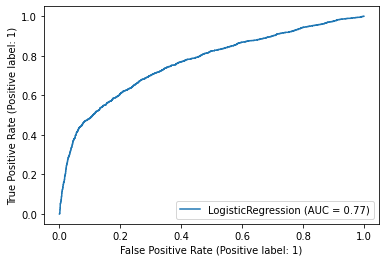

In [80]:
# ROC Curve
from sklearn import metrics
metrics.plot_roc_curve(model_lr, x_test, y_test)